# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df.head() #displays all the observations in the data frame

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Exploratory Data Analysis

In [3]:
#check the shape of the dataframe
print('Size of data frame: ',df.shape)

Size of data frame:  (145460, 23)


Rows = 145460
Columns = 23

Target = 'RainTomorrow'

# * There are 23 variables in the data frame. 
#  * We take 'RainTomorrow' as the **testing variable** that helps us to identify the weather condition tomorrow.
# * The rest 22 variables are considered to be **predictor variables**

# Data Pre-processing

In [4]:
print(df.count().sort_values())

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64


# Delete unwanted variables

# Remove null values - if any

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# **isna()** function is used to detect missing values. 
# It return a boolean same-sized object indicating if the values are NA, such as None or numpy. 
# NaN, gets mapped to True values. 
# Everything else gets mapped to False values.

In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.describe(include="O")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# The **nunique()** method returns the number of unique values for each column.

In [9]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [10]:
#target count
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

### Visualization Analysis

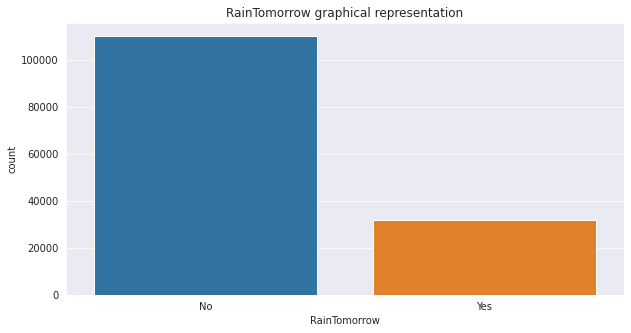

In [11]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow graphical representation')
sns.countplot(x=df["RainTomorrow"]);

### Multivariate

# Preprocessing



In [12]:
df_preprocessed = df.copy()

In [13]:
df_preprocessed.isnull().mean() * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [14]:
df_preprocessed.replace(np.nan, 'NaN', inplace=True)
df_preprocessed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [16]:
df_preprocessed['Date'] = pd.to_datetime(df_preprocessed['Date'])

In [17]:
#columns segregation
date_columns = ['Date']
cat_columns = df_preprocessed.select_dtypes(include=['object']).columns
num_columns = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'RainTomorrow'

# Encoding the categorical variables

# Categorical variables can take on only a limited, and usually fixed number of possible values. 
# Besides the fixed length, categorical data might have an order but cannot perform numerical operation. 
# Categorical are a Pandas data type.

In [18]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [19]:
cat_columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
for i in cat_columns:
    print('Unique Values in ' + i + ' Column:', end = " ")
    print(len(df_preprocessed[i].unique()))
    print('-----------------------------------------------------')

Unique Values in Location Column: 49
-----------------------------------------------------
Unique Values in MinTemp Column: 390
-----------------------------------------------------
Unique Values in MaxTemp Column: 506
-----------------------------------------------------
Unique Values in Rainfall Column: 682
-----------------------------------------------------
Unique Values in Evaporation Column: 359
-----------------------------------------------------
Unique Values in Sunshine Column: 146
-----------------------------------------------------
Unique Values in WindGustDir Column: 17
-----------------------------------------------------
Unique Values in WindGustSpeed Column: 68
-----------------------------------------------------
Unique Values in WindDir9am Column: 17
-----------------------------------------------------
Unique Values in WindDir3pm Column: 17
-----------------------------------------------------
Unique Values in WindSpeed9am Column: 44
-------------------------------

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df_preprocessed[i] = le.fit_transform(df_preprocessed[i])
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,NaN,NaN,14,44.0,14,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,15,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,2,12.9,25.7,0.0,NaN,NaN,16,46.0,14,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,4,24.0,10,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,14,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [22]:
df_preprocessed[['RainToday']].value_counts()

RainToday
No           110319
Yes           31880
NaN            3261
dtype: int64

In [23]:
df_preprocessed[['RainTomorrow']].value_counts()

RainTomorrow
No              110316
Yes              31877
NaN               3267
dtype: int64

In [24]:
df_preprocessed[['RainToday','RainTomorrow']].isna().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [25]:
df_clean = df_preprocessed[(df_preprocessed != "NaN").all(axis=1)]
del df_preprocessed

In [26]:
df_clean['RainToday'].value_counts()

No     45323
Yes    12767
Name: RainToday, dtype: int64

In [27]:
label_dict = {'No': 0,'Yes':1}
df_clean['RainTomorrow'] = df_clean['RainTomorrow'].map(label_dict)
df_clean['RainToday'] = df_clean['RainToday'].map(label_dict)

In [28]:
df_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,10,17.9,35.2,0.0,12.0,12.3,12,48.0,1,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,10,18.4,28.9,0.0,14.8,13.0,9,37.0,11,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,10,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,10,21.9,38.4,0.0,11.4,12.2,15,31.0,15,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,10,24.2,41.0,0.0,11.2,8.4,15,35.0,7,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [29]:
# removing Date Column
df_clean.drop(['Date'], axis=1, inplace=True)

In [30]:
df_clean.reset_index(drop=True, inplace=True)

# DATA SPLICING - Splitting the dataset into training and testing datasets

In [31]:
# train test split
from sklearn.model_selection import train_test_split
X = df_clean.drop(columns=["RainTomorrow"])
y = df_clean["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train_scaled.shape

(40663, 21)

In [34]:
X_train_scaled[0,:]

array([0.4       , 0.63779528, 0.6712963 , 0.        , 0.14958449,
       0.8041958 , 0.6875    , 0.32173913, 0.        , 0.6875    ,
       0.28358209, 0.19736842, 0.51      , 0.24      , 0.66206897,
       0.65448505, 0.125     , 0.33333333, 0.59600998, 0.63443396,
       0.        ])

# Feature Selection


In [35]:
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(k=10)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

# BaseLine Data Modeling
Using multiple algorithms over the same dataset to measure the accuracy




In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_lr = lr.predict(X_test_scaled)

# Decision Tree

In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
y_dtree = dtree.predict(X_test_scaled)

# Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train_scaled, y_train)
y_rf = rf.predict(X_test_scaled)

# Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("Logistic Regression: ", accuracy_score(y_test, y_lr))
print("-"*30)


print("-"*30)
print("Decision Tree: ", accuracy_score(y_test, y_dtree))
print("-"*30)


print("-"*30)
print("Random Forest: ", accuracy_score(y_test, y_rf))
print("-"*30)


********** Accuracy **********
------------------------------
Logistic Regression:  0.8471911401847707
------------------------------
------------------------------
Decision Tree:  0.7890629482986171
------------------------------
------------------------------
Random Forest:  0.8547082113961095
------------------------------


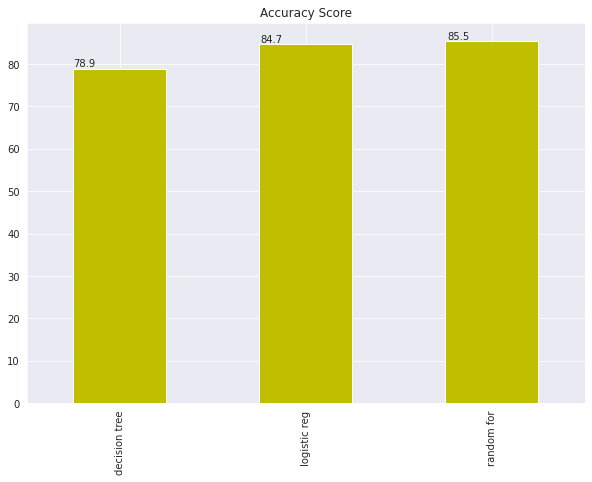

In [41]:
metric_val = {
    "accuracy score": {
    "logistic reg": accuracy_score(y_test,y_lr)*100,
    "decision tree": accuracy_score(y_test,y_dtree)*100,
    "random for": accuracy_score(y_test,y_rf)*100
    }
}

ax = pd.DataFrame(metric_val).plot(kind="bar", 
                             figsize = (10,7), 
                             legend =False, 
                             title = "Accuracy Score",
                             color = "y");
                    
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.005))

# Model Evaluation (performance analysis)



In [42]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_scaled)
print('Logistic Regression: ',accuracy_score(y_pred, y_test))

Logistic Regression:  0.8471911401847707


In [43]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test_scaled)
print('Decision Tree: ',accuracy_score(y_pred, y_test))

Decision Tree:  0.7890629482986171


In [44]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test_scaled)
print('Random Forest: ',accuracy_score(y_pred, y_test))

Random Forest:  0.8547082113961095


***